In [171]:
from sola.main_classes import functions
from sola.main_classes import domains
import numpy as np
from line_profiler import LineProfiler
from scipy import integrate
import time

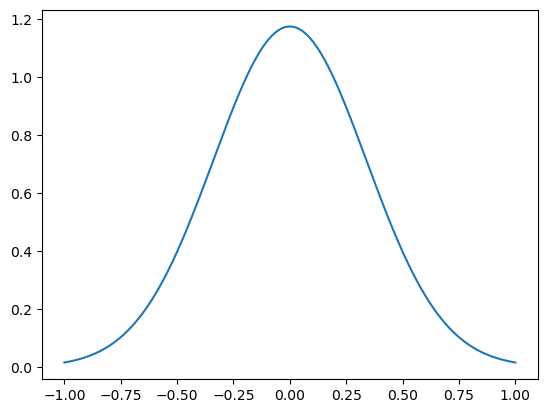

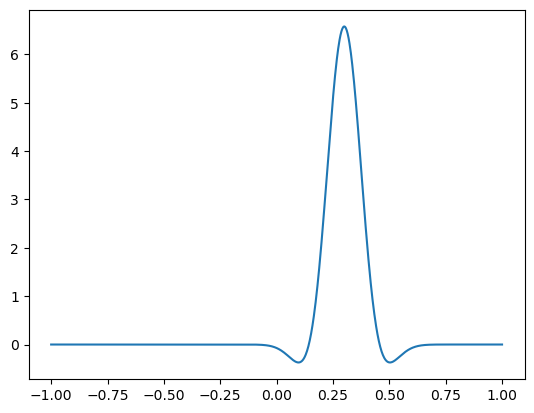

In [172]:
%matplotlib inline
domain = domains.HyperParalelipiped([[-1, 1], ])
f = functions.Gaussian_1D(domain=domain, center=0, width=2)
g = functions.Moorlet_1D(domain=domain, center=0.3, spread=0.1, frequency=10)
f.plot()
g.plot()

In [173]:
# Testing single integration on Gaussians
a, b = -1, 1
# QUAD integration
start_time = time.time()
result_gaussian, error_gaussian = integrate.quad(f.evaluate, a, b)
end_time = time.time()
quad_time = end_time - start_time
print('quad: result: ' + str(result_gaussian) + '+-' + str(error_gaussian), 'time: ' + str(quad_time))

# fixed quad
start_time = time.time()
result_gaussian, error_gaussian = integrate.fixed_quad(f.evaluate, a, b)
end_time = time.time()
quad_time = end_time - start_time
print('fixed_quad: result: ' + str(result_gaussian) + '+-' + str(error_gaussian), 'time: ' + str(quad_time))

# quadreture
start_time = time.time()
result_gaussian, error_gaussian = integrate.quadrature(f.evaluate, a, b)
end_time = time.time()
quadrature_time = end_time - start_time
print('quadrature: result: ' + str(result_gaussian) + '+-' + str(error_gaussian), 'time: ' + str(quadrature_time))

# romberg
start_time = time.time()
result_gaussian = integrate.romberg(f.evaluate, a, b)
end_time = time.time()
romberg_time = end_time - start_time
print('romberg: result: ' + str(result_gaussian), 'time: ' + str(romberg_time))

# Numerical with trapz
start_time = time.time()
result = integrate.simpson(f.evaluate(np.linspace(a, b, 1000)), np.linspace(-a, b, 1000))
end_time = time.time()
trapz_time = end_time - start_time
print('trapz: result: ' + str(result), 'time: ' + str(trapz_time))

quad: result: 0.9967550244534376+-1.1066203817422472e-14 time: 0.00043582916259765625
fixed_quad: result: 1.004009584914994+-None time: 4.482269287109375e-05
quadrature: result: 0.9967550246741919+-2.8991222755792023e-09 time: 0.0001811981201171875
romberg: result: [0.99675502] time: 0.0009911060333251953
trapz: result: 0.0 time: 0.00017499923706054688
